In [171]:
%matplotlib inline

import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import statsmodels.api as sm

In [60]:
DISCPLINES = ('men', 'ladies', 'pairs', 'dance')

In [3]:
with open('seasons.pickle') as f:
    seasons = pickle.load(f)

In [86]:
with open('pd_data/name_fixes_all.json') as f:
    name_fixes = json.load(f)

In [4]:
num_seasons = len(seasons)
num_events = 0
for season in seasons.values():
    num_events += len(season.events)

In [216]:
seasons['2018'].events

[gprus2017,
 gpcan2017,
 gpchn2017,
 gpjpn2017,
 gpfra2017,
 gpusa2017,
 gpf1718,
 ec2018,
 fc2018,
 owg2018]

In [5]:
num_seasons, num_events

(13, 133)

In [62]:
results = {}

In [215]:
for discipline in DISCPLINES:
    results[discipline] = pd.read_csv('pd_data/results_nowd_nofra15_' + discipline + '.csv')
    results18 = pd.read_csv('pd_data/results18all_' + discipline + '.csv')
    results18['Season'] = [2018 for _ in xrange(len(results18))]
    results18.Name = results18.apply(lambda row: name_fixes.get(row.Name, row.Name), axis=1)
    results18.to_csv('pd_data/results18all_' + discipline + '.csv')
    results[discipline] = pd.concat([results[discipline], results18])
    results[discipline] = results[discipline][results[discipline].Rank != 'WD']
    print len(results[discipline].Name.unique()), len(results[discipline])

318 2218
404 2311
213 1358
264 1716


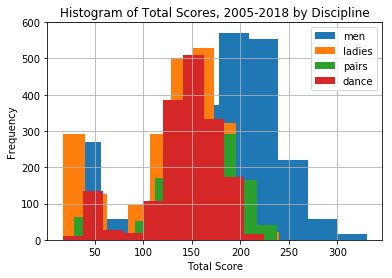

In [214]:
for discipline in DISCPLINES:
    results[discipline].Points.hist(label=discipline)
plt.legend()
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.title('Histogram of Total Scores, 2005-2018 by Discipline')
plt.savefig('/Users/mengyazhu96/Dropbox/thesis/writeup/figures/data/total_score')

In [137]:
dance = results['dance']

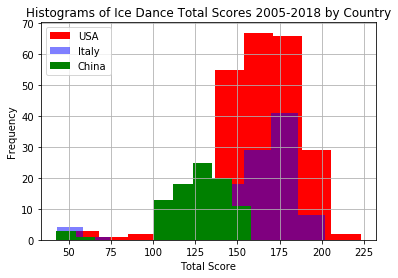

In [398]:
dance[dance.Nation == 'USA'].Points.astype('float').hist(label='USA', color= 'r')
dance[dance.Nation == 'ITA'].Points.astype('float').hist(label='Italy', alpha = 0.5, lw=3, color= 'b')
dance[dance.Nation == 'CHN'].Points.astype('float').hist(label='China', color= 'g')
plt.legend(loc=2)
plt.title('Histograms of Ice Dance Total Scores 2005-2018 by Country')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.savefig('/Users/mengyazhu96/Dropbox/thesis/writeup/figures/data/dance_country')

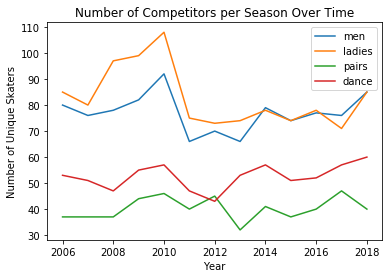

In [212]:
num_competitors = {}
for discipline in DISCPLINES:
    num_competitors[discipline] = []
    for season in seasons:
        num_competitors[discipline].append(len(results[discipline][results[discipline].Season == int(season)].Name.unique()))
    plt.plot(seasons.keys(), num_competitors[discipline], label=discipline)
plt.legend(loc=1)
plt.xlabel('Year')
plt.ylabel('Number of Unique Skaters')
plt.title('Number of Competitors per Season Over Time')
plt.savefig('/Users/mengyazhu96/Dropbox/thesis/writeup/figures/data/num_competitors')

In [159]:
results['men'].Rank = results['men'].Rank.astype('float')

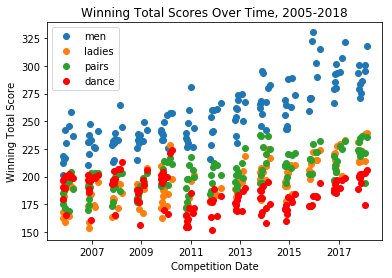

In [217]:
# num_competitors = {}
for discipline in DISCPLINES:
    results[discipline].Rank = results[discipline].Rank.astype('float')
    win = results[discipline][results[discipline].Rank == 1]
    if discipline == 'dance':
        plt.plot_date(pd.to_datetime(win.Date),
                      win.Points.astype('float'),
                      'ro',
                      label=discipline)
    else:
        plt.plot_date(pd.to_datetime(win.Date),
                      win.Points.astype('float'),
                      label=discipline)
plt.legend(loc=2)
plt.xlabel('Competition Date')
plt.ylabel('Winning Total Score')
plt.title('Winning Total Scores Over Time, 2005-2018')
plt.savefig('/Users/mengyazhu96/Dropbox/thesis/writeup/figures/data/score_growth')

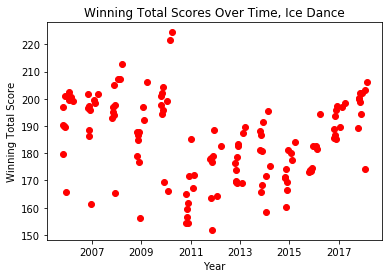

In [211]:
win = results['dance'][results['dance'].Rank == 1]
plt.plot_date(pd.to_datetime(win.Date),
              win.Points.astype('float'), 'ro')
plt.xlabel('Year')
plt.ylabel('Winning Total Score')
plt.title('Winning Total Scores Over Time, Ice Dance')
plt.savefig('/Users/mengyazhu96/Dropbox/thesis/writeup/figures/data/score_growth_dance')

In [ ]:
individual_bests_short = {}
individual_bests_free = {}

In [179]:
for discipline in DISCPLINES:
    history = results[discipline]
    individual_bests_short[discipline] = {skater: np.max(map(float, history[history.Name == skater]['Short Score']))
                          for skater in history.Name.get_values()}
    have_frees = history[history['Free Rank'] != 'DNQ']
    have_frees = have_frees[have_frees['Free Rank'] != 'WD']
    individual_bests_free[discipline] = {skater: np.max(map(float, have_frees[have_frees.Name == skater]['Free Score']))
                         for skater in have_frees.Name.get_values()}

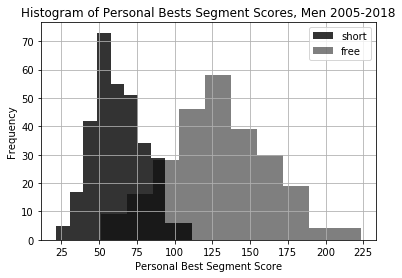

In [364]:
pd.Series(individual_bests_short['men']).hist(label='short', fc=(0,0,0,0.8))
pd.Series(individual_bests_free['men']).hist(label='free', fc=(0,0,0,0.5))
plt.legend()
plt.title('Histogram of Personal Bests Segment Scores, Men 2005-2018')
plt.xlabel('Personal Best Segment Score')
plt.ylabel('Frequency')
plt.savefig('/Users/mengyazhu96/Dropbox/thesis/writeup/figures/data/reputation')

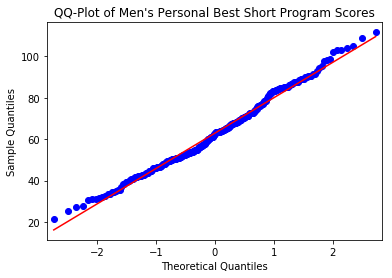

In [378]:
sm.graphics.qqplot(pd.Series(individual_bests_short['men']), line='s')
plt.title('QQ-Plot of Men\'s Personal Best Short Program Scores')
plt.savefig('/Users/mengyazhu96/Dropbox/thesis/writeup/figures/data/men_short_qq')

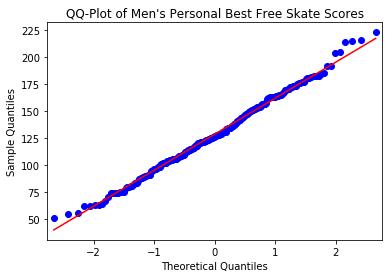

In [377]:
sm.graphics.qqplot(pd.Series(individual_bests_free['men']), line='s')
plt.title('QQ-Plot of Men\'s Personal Best Free Skate Scores')
plt.savefig('/Users/mengyazhu96/Dropbox/thesis/writeup/figures/data/men_free_qq')

In [194]:
results['men'].columns

Index([u'Date', u'Event', u'Free Rank', u'Free Score', u'Free Start', u'Name',
       u'Nation', u'Num Free Scorecards', u'Num Short Scorecards', u'Points',
       u'Rank', u'Season', u'Short Rank', u'Short Score', u'Short Start',
       u'Unnamed: 0', u'Unnamed: 0.1'],
      dtype='object')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


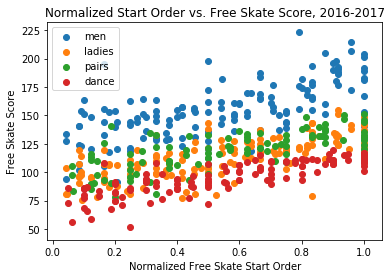

In [381]:
for discipline in DISCPLINES:
    data2017 = results[discipline][results[discipline].Season == 2017]
    data2017['normalized_start'] = data2017['Free Start']/data2017['Num Free Scorecards']
    data2017 = data2017[data2017.normalized_start <= 1.]
    plt.scatter(data2017['Free Start']/data2017['Num Free Scorecards'], data2017['Free Score'], label=discipline)
plt.legend(loc=2)
plt.xlabel('Normalized Free Skate Start Order')
plt.ylabel('Free Skate Score')
plt.title('Normalized Start Order vs. Free Skate Score, 2016-2017')
plt.savefig('/Users/mengyazhu96/Dropbox/thesis/writeup/figures/data/start_order')

In [228]:
goes = {}
for discipline in DISCPLINES:
    goes[discipline] = pd.read_csv('pd_data/goes_' + discipline + '.csv')
    goes[discipline]['discipline'] = [discipline for _ in xrange(len(goes[discipline]))]

In [243]:
elements = {}
for discipline in DISCPLINES:
    elements[discipline] = pd.read_csv('pd_data/elements_' + discipline + '.csv')

In [242]:
comp = {}
comp_summary = {}
for discipline in DISCPLINES:
    comp[discipline] = pd.read_csv('pd_data/components_' + discipline + '.csv')
    comp_summary[discipline] = pd.read_csv('pd_data/components_summary_' + discipline + '.csv')

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [342]:
all_goes = pd.concat(goes.values())
all_comp = pd.concat(comp.values())

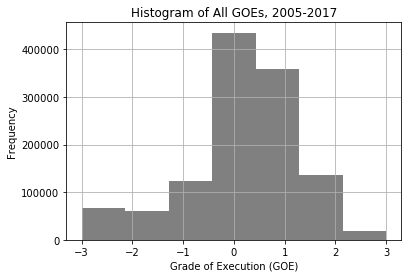

In [384]:
all_goes.GOE.hist(color='gray', bins=7)
plt.title('Histogram of All GOEs, 2005-2017')
plt.xlabel('Grade of Execution (GOE)')
plt.ylabel('Frequency')
plt.savefig('/Users/mengyazhu96/Dropbox/thesis/writeup/figures/data/goe_all_hist')

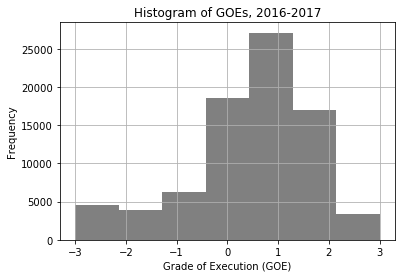

In [386]:
all_goes[all_goes.Segment.str.contains('2016')].GOE.hist(color='gray', bins=7)
plt.title('Histogram of GOEs, 2016-2017')
plt.xlabel('Grade of Execution (GOE)')
plt.ylabel('Frequency')
plt.savefig('/Users/mengyazhu96/Dropbox/thesis/writeup/figures/data/goe_2017_hist')

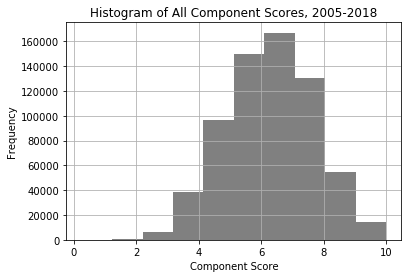

In [340]:
all_comp.Score.hist(color='gray')
plt.title('Histogram of All Component Scores, 2005-2017')
plt.xlabel('Component Score')
plt.ylabel('Frequency')
plt.savefig('/Users/mengyazhu96/Dropbox/thesis/writeup/figures/data/all_comp')

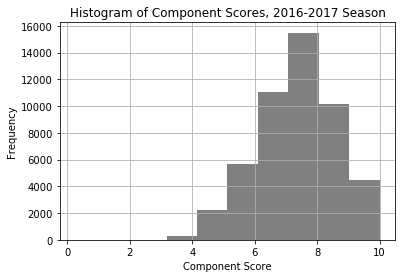

In [339]:
all_comp = pd.concat(comp.values())
all_comp[all_comp.Season == 2017].Score.hist(color='gray')
plt.title('Histogram of Component Scores, 2016-2017 Season')
plt.xlabel('Component Score')
plt.ylabel('Frequency')
plt.savefig('/Users/mengyazhu96/Dropbox/thesis/writeup/figures/data/all_comp_2017')

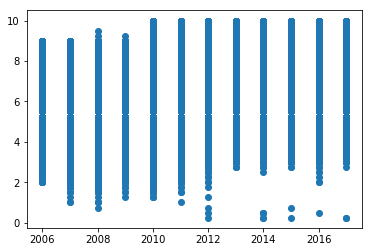

In [388]:
plt.scatter(all_comp.Season, all_comp.Score)

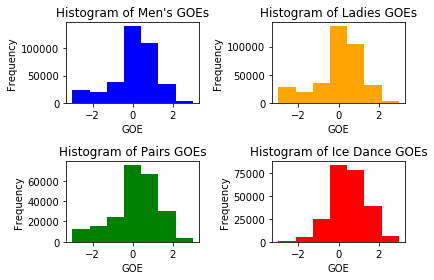

In [394]:
f, axarr = plt.subplots(2, 2)
axarr[0, 0].hist(goes['men'].GOE, color='blue', bins=7)
axarr[0, 0].set_title('Histogram of Men\'s GOEs')
axarr[0, 0].set_xlabel('GOE')
axarr[0, 0].set_ylabel('Frequency')

axarr[0, 1].hist(goes['ladies'].GOE, color='orange', bins=7)
axarr[0, 1].set_title('Histogram of Ladies GOEs')
axarr[0, 1].set_xlabel('GOE')
axarr[0, 1].set_ylabel('Frequency')

axarr[1, 0].hist(goes['pairs'].GOE, color='green', bins=7)
axarr[1, 0].set_title('Histogram of Pairs GOEs')
axarr[1, 0].set_xlabel('GOE')
axarr[1, 0].set_ylabel('Frequency')

axarr[1, 1].hist(goes['dance'].GOE, color='red', bins=7)
axarr[1, 1].set_xlabel('GOE')
axarr[1, 1].set_ylabel('Frequency')
axarr[1, 1].set_title('Histogram of Ice Dance GOEs')
# f.suptitle('Histograms of GOEs by Discipline, 2005-2017', y=1.02, x=0.52)
plt.tight_layout()
f.savefig('/Users/mengyazhu96/Dropbox/thesis/writeup/figures/data/goe_breakdown')

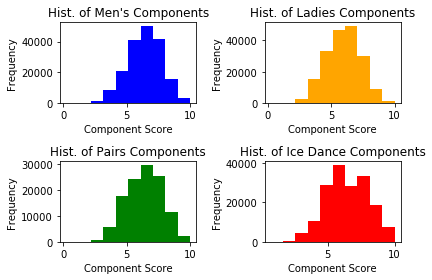

In [397]:
f, axarr = plt.subplots(2, 2)
axarr[0, 0].hist(comp['men'].Score, color='blue')
axarr[0, 0].set_title('Hist. of Men\'s Components')
axarr[0, 0].set_xlabel('Component Score')
axarr[0, 0].set_ylabel('Frequency')

axarr[0, 1].hist(comp['ladies'].Score, color='orange')
axarr[0, 1].set_title('Hist. of Ladies Components')
axarr[0, 1].set_xlabel('Component Score')
axarr[0, 1].set_ylabel('Frequency')

axarr[1, 0].hist(comp['pairs'].Score, color='green')
axarr[1, 0].set_title('Hist. of Pairs Components')
axarr[1, 0].set_xlabel('Component Score')
axarr[1, 0].set_ylabel('Frequency')

axarr[1, 1].hist(comp['dance'].Score, color='red')
axarr[1, 1].set_xlabel('Component Score')
axarr[1, 1].set_ylabel('Frequency')
axarr[1, 1].set_title('Hist. of Ice Dance Components')
# f.suptitle('Histograms of Components Scores by Discipline, 2005-2017', y=1.02, x=0.52)
plt.tight_layout()
f.savefig('/Users/mengyazhu96/Dropbox/thesis/writeup/figures/data/comp_breakdown')